In [ ]:
import pandas as pd

# Load the data
df = pd.read_excel("/Business analyst task (1) (1).xlsx", engine="openpyxl")

print(df.head())


                  User ID assigned_date attempted_date             Lead owner  \
0  a037c322-31fe-4a2a-adf    2025-04-10     2025-04-11  reea037c322@dummy.com   
1  36c0a89b-32b8-423e-adb    2025-04-07     2025-04-08  sha36c0a89b@dummy.com   
2  f2700819-15fd-413f-a7a    2025-03-21     2025-03-23  mohf2700819@dummy.com   
3  369e7e80-7fd6-4b14-934    2025-04-16     2025-04-16  v.k369e7e80@dummy.com   
4  08308271-5b82-4f41-bb8    2025-03-01     2025-03-05  ish08308271@dummy.com   

      grade      main_stage       sub_stage              super_sub_stage  \
0  Class 10  Lead Connected  Not Interested  Engaged in Offline Tuitions   
1  Class 10     Non Contact     No Response                       DNP 5+   
2  Class 10  Lead Connected  Not Interested  Engaged in Offline Tuitions   
3  Class 10     Non Contact             DNP                        DNP 4   
4  Class 10     Non Contact     No Response                       DNP 5+   

   First call attempt TAT  First Call Connect_TAT Team L

In [ ]:
print(df.columns)

Index(['User ID', 'assigned_date', 'attempted_date', 'Lead owner', 'grade',
       'main_stage', 'sub_stage', 'super_sub_stage', 'First call attempt TAT',
       'First Call Connect_TAT', 'Team Leader', 'demo_booked', 'demo_done',
       'state', 'talk_time', 'Agent tenurity (in Months)', 'Revenue'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
User ID,0
assigned_date,0
attempted_date,913
Lead owner,0
grade,0
main_stage,0
sub_stage,0
super_sub_stage,1
First call attempt TAT,913
First Call Connect_TAT,5834


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   User ID                     16383 non-null  object        
 1   assigned_date               16383 non-null  datetime64[ns]
 2   attempted_date              15470 non-null  datetime64[ns]
 3   Lead owner                  16383 non-null  object        
 4   grade                       16383 non-null  object        
 5   main_stage                  16383 non-null  object        
 6   sub_stage                   16383 non-null  object        
 7   super_sub_stage             16382 non-null  object        
 8   First call attempt TAT      15470 non-null  float64       
 9   First Call Connect_TAT      10549 non-null  float64       
 10  Team Leader                 16383 non-null  object        
 11  demo_booked                 16383 non-null  int64     

In [ ]:
# Fill missing numerical values with median (to preserve data consistency)
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert date columns to datetime format for proper analysis
df['assigned_date'] = pd.to_datetime(df['assigned_date'])
df['attempted_date'] = pd.to_datetime(df['attempted_date'])

# Confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   User ID                     16383 non-null  object        
 1   assigned_date               16383 non-null  datetime64[ns]
 2   attempted_date              15470 non-null  datetime64[ns]
 3   Lead owner                  16383 non-null  object        
 4   grade                       16383 non-null  object        
 5   main_stage                  16383 non-null  object        
 6   sub_stage                   16383 non-null  object        
 7   super_sub_stage             16382 non-null  object        
 8   First call attempt TAT      16383 non-null  float64       
 9   First Call Connect_TAT      16383 non-null  float64       
 10  Team Leader                 16383 non-null  object        
 11  demo_booked                 16383 non-null  int64     

In [ ]:
import plotly.graph_objects as go

# Count leads at each stage of the funnel
stage_counts = df['main_stage'].value_counts()

# Create Funnel Chart with adjusted size
fig = go.Figure(go.Funnel(
    y=stage_counts.index,
    x=stage_counts.values
))

# Set smaller figure dimensions
fig.update_layout(title="Sales Funnel Analysis", width=800, height=600)

# Show the chart
fig.show()


In [ ]:
import plotly.graph_objects as go

# Count leads at each stage of the funnel
stage_counts = df['main_stage'].value_counts()

# Convert index and values to lists for better compatibility
stage_labels = stage_counts.index.tolist()
stage_values = stage_counts.values.tolist()

# Create Funnel Chart
fig = go.Figure(go.Funnel(
    y=stage_labels,
    x=stage_values,
    textinfo="value+percent initial",  # Proper formatting for percentage display
    opacity=0.95,
    marker=dict(color="rgba(85, 19, 215)")
))

# Adjust layout
fig.update_layout(
    title="Sales Funnel Analysis",
    width=800, height=600,
    font=dict(size=15, color="black"),
    title_font=dict(size=20, color="black"),
    xaxis=dict(showgrid=False),  # Removes grid
    yaxis=dict(showgrid=False),
    template="plotly_white"
)

# Show the chart
fig.show()


In [ ]:
fig.write_html("/content/sales_funnel_chart.html")  # Saves interactive chart


In [ ]:
# Group by agent/lead owner and calculate metrics
agent_perf = df.groupby('Lead owner').agg({
    'demo_booked': 'sum',
    'demo_done': 'sum',
    'Revenue': 'sum'  # Replace 'Revenue' with exact column name if different
}).reset_index()

# Sort by revenue descending
agent_perf = agent_perf.sort_values(by='Revenue', ascending=False)

print(agent_perf.head())


               Lead owner  demo_booked  demo_done     Revenue
20  hum1ca0172c@dummy.com           60         30  11370000.0
62  samdf74bd63@dummy.com           42         18  10656000.0
0   aase88faf35@dummy.com           40         20   9522000.0
49  pur4f30a218@dummy.com           47         38   9263000.0
36  moh6aec129b@dummy.com           32         13   9000000.0


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Create DataFrame
data = {
    "Agent Name": ["hum1ca0172c@dummy.com", "samdf74bd63@dummy.com", "aase88faf35@dummy.com",
                   "pur4f30a218@dummy.com", "moh6aec129b@dummy.com"],
    "demo_booked": [60, 42, 40, 47, 32],
    "demo_done": [30, 18, 20, 38, 13],
    "Revenue": [11370000, 10656000, 9522000, 9263000, 9000000]
}
df = pd.DataFrame(data)

# Sort and filter top 5 agents
df = df.sort_values(by="Revenue", ascending=False).head(5)

# Melt data for bar plot
melted = df.melt(id_vars="Agent Name", value_vars=["demo_booked", "demo_done"],
                 var_name="Metric", value_name="Count")

# Create bar chart for demo metrics
fig = px.bar(melted, x="Agent Name", y="Count", color="Metric",
             title="🎯 Top 5 Agent Performance: Demos vs Revenue",
             labels={"Agent Name": "Agent", "Count": "Demo Count"},
             text_auto=True,
             color_discrete_sequence=["#FF6F00", "#4D55CC"])  # Orange & blue theme

# Overlay revenue line graph
fig.add_trace(go.Scatter(x=df["Agent Name"], y=df["Revenue"],
                         mode="lines+markers", name="Revenue (₹)",
                         line=dict(color="crimson", width=3),
                         marker=dict(size=8)))

# Adjust layout for clarity
fig.update_layout(width=750, height=450, xaxis_title="Agent", yaxis_title="Demo Count / Revenue")

# Show the chart
fig.show()


In [ ]:
print(df.columns.tolist())


['Agent Name', 'demo_booked', 'demo_done', 'Revenue']


In [ ]:
# Group by agent name and calculate performance metrics
agent_perf = df.groupby('Agent Name').agg({
    'demo_booked': 'sum',
    'demo_done': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Sort agents by revenue in descending order
agent_perf = agent_perf.sort_values(by='Revenue', ascending=False)

# Show top 5 agents
print(agent_perf.head())


              Agent Name  demo_booked  demo_done   Revenue
1  hum1ca0172c@dummy.com           60         30  11370000
4  samdf74bd63@dummy.com           42         18  10656000
0  aase88faf35@dummy.com           40         20   9522000
3  pur4f30a218@dummy.com           47         38   9263000
2  moh6aec129b@dummy.com           32         13   9000000


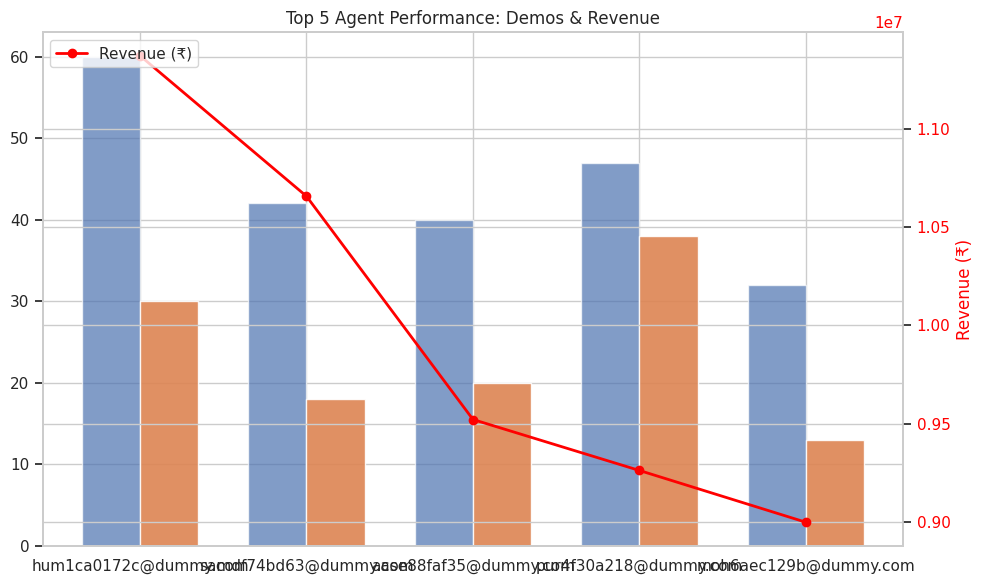

In [ ]:
import matplotlib.pyplot as plt

# Use the agent_perf DataFrame you created
top_agents = agent_perf.head(5)

plt.figure(figsize=(10, 6))

# Bars for demos booked and demos done (side by side for clarity)
bar_width = 0.35
indices = range(len(top_agents))

plt.bar(indices, top_agents['demo_booked'], width=bar_width, label='Demos Booked', alpha=0.7)
plt.bar([i + bar_width for i in indices], top_agents['demo_done'], width=bar_width, label='Demos Done', alpha=0.9)

# Create a secondary axis for revenue
ax2 = plt.gca().twinx()
ax2.plot([i + bar_width/2 for i in indices], top_agents['Revenue'], color='red', marker='o', label='Revenue (₹)', linewidth=2)
ax2.set_ylabel('Revenue (₹)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis labels
plt.xticks([i + bar_width/2 for i in indices], top_agents['Agent Name'], rotation=45, ha='right')

plt.xlabel('Agent Name')
plt.title('Top 5 Agent Performance: Demos & Revenue')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


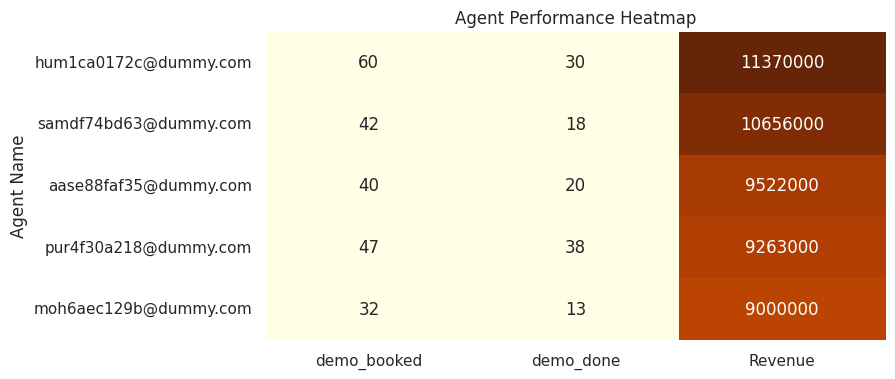

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 4))
perf_data = top_agents.set_index('Agent Name')[['demo_booked', 'demo_done', 'Revenue']]
sns.heatmap(perf_data, annot=True, fmt='.0f', cmap='YlOrBr', cbar=False)
plt.title('Agent Performance Heatmap')
plt.show()


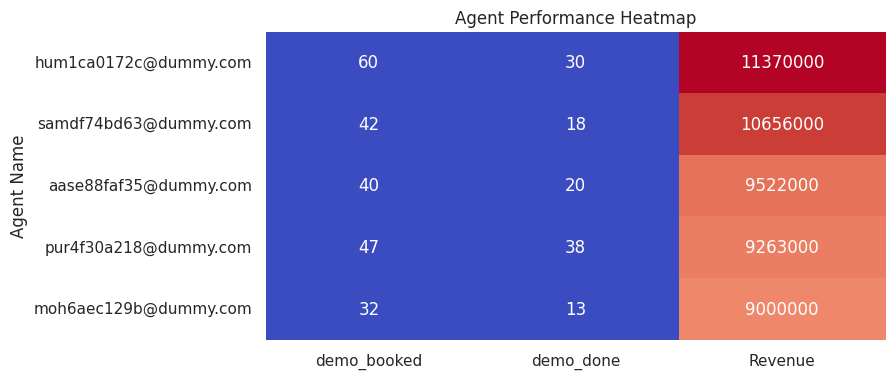

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
perf_data = top_agents.set_index('Agent Name')[['demo_booked', 'demo_done', 'Revenue']]
sns.heatmap(perf_data, annot=True, fmt='.0f', cmap='coolwarm', cbar=False)
plt.title('Agent Performance Heatmap')
plt.show()


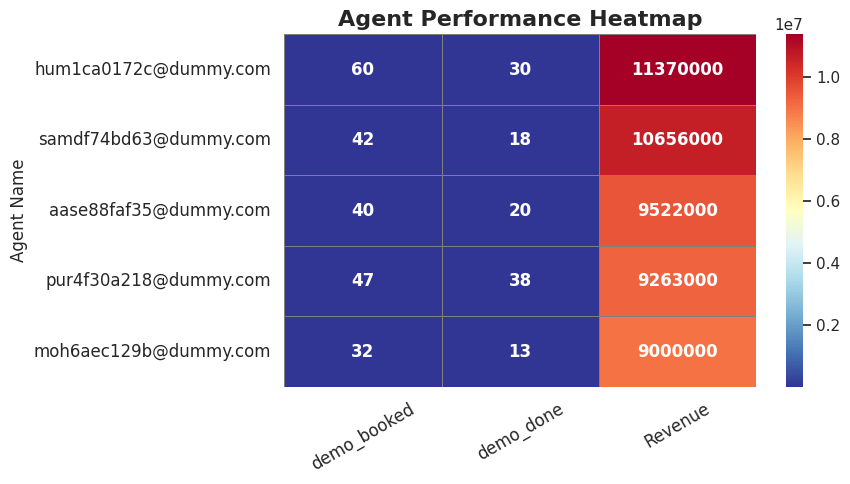

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
perf_data = top_agents.set_index('Agent Name')[['demo_booked', 'demo_done', 'Revenue']]

sns.heatmap(
    perf_data,
    annot=True,
    fmt='.0f',
    cmap='RdYlBu_r',  # reversed red-yellow-blue
    cbar=True,       # subtle color bar on right
    linewidths=0.5,  # cell borders
    linecolor='gray',# light gray borders
    annot_kws={"size": 12, "weight": "bold"},  # bigger, bold text
    square=False
)

plt.title('Agent Performance Heatmap', fontsize=16, weight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


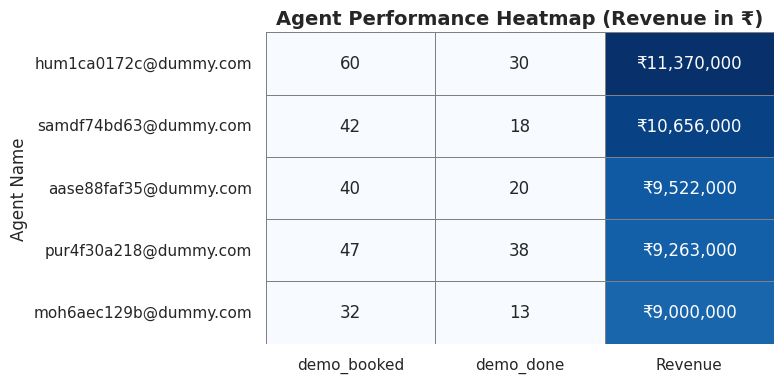

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data with revenue as int formatted with commas
perf_data = top_agents.set_index('Agent Name')[['demo_booked', 'demo_done', 'Revenue']]

# Create a custom annot dataframe for showing formatted values
annot_data = perf_data.copy()
annot_data['Revenue'] = annot_data['Revenue'].apply(lambda x: f"₹{x:,.0f}")

plt.figure(figsize=(8, 4))

sns.heatmap(
    perf_data,
    annot=annot_data,
    fmt='',
    cmap='Blues',      # Business-friendly blue gradient
    cbar=False,
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Agent Performance Heatmap (Revenue in ₹)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

perf_data = top_agents.set_index('Agent Name')[['demo_booked', 'demo_done', 'Revenue']]

# Format annotations (with rupees and commas for Revenue)
annotations = []
for i, agent in enumerate(perf_data.index):
    for j, col in enumerate(perf_data.columns):
        value = perf_data.iloc[i, j]
        if col == 'Revenue':
            text = f"₹{value:,.0f}"
        else:
            text = str(int(value))
        annotations.append(
            dict(
                x=col,
                y=agent,
                text=text,
                showarrow=False,
                font=dict(color='black', size=12)
            )
        )

# Custom business colorscale: blue to orange
colorscale = [
    [0.0, 'rgb(240, 240, 230)'],      # dark navy blue
    [0.25, 'rgb(0, 123, 167)'],   # medium blue
    [0.5, 'rgb(255, 179, 71)'],   # light orange
    [0.75, 'rgb(255, 140, 0)'],   # orange
    [1.0, 'rgb(204, 85, 0)']      # dark orange/red
]

fig = go.Figure(data=go.Heatmap(
    z=perf_data.values,
    x=perf_data.columns,
    y=perf_data.index,
    colorscale=colorscale,
    showscale=True
))

fig.update_layout(
    title='Agent Performance Heatmap (Business Colors)',
    annotations=annotations,
    yaxis=dict(autorange='reversed'),
    width=800,
    height=400,
)

fig.show()


333333333333333

In [ ]:
df.columns


Index(['Agent Name', 'demo_booked', 'demo_done', 'Revenue'], dtype='object')

In [ ]:
import pandas as pd

# Load the data
df = pd.read_excel("/Business analyst task (1) (1).xlsx", engine="openpyxl")

print(df.head())

                  User ID assigned_date attempted_date             Lead owner  \
0  a037c322-31fe-4a2a-adf    2025-04-10     2025-04-11  reea037c322@dummy.com   
1  36c0a89b-32b8-423e-adb    2025-04-07     2025-04-08  sha36c0a89b@dummy.com   
2  f2700819-15fd-413f-a7a    2025-03-21     2025-03-23  mohf2700819@dummy.com   
3  369e7e80-7fd6-4b14-934    2025-04-16     2025-04-16  v.k369e7e80@dummy.com   
4  08308271-5b82-4f41-bb8    2025-03-01     2025-03-05  ish08308271@dummy.com   

      grade      main_stage       sub_stage              super_sub_stage  \
0  Class 10  Lead Connected  Not Interested  Engaged in Offline Tuitions   
1  Class 10     Non Contact     No Response                       DNP 5+   
2  Class 10  Lead Connected  Not Interested  Engaged in Offline Tuitions   
3  Class 10     Non Contact             DNP                        DNP 4   
4  Class 10     Non Contact     No Response                       DNP 5+   

   First call attempt TAT  First Call Connect_TAT Team L

In [ ]:
df.info()  # Shows column names & data types
df.describe()  # Quick statistics overview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   User ID                     16383 non-null  object        
 1   assigned_date               16383 non-null  datetime64[ns]
 2   attempted_date              15470 non-null  datetime64[ns]
 3   Lead owner                  16383 non-null  object        
 4   grade                       16383 non-null  object        
 5   main_stage                  16383 non-null  object        
 6   sub_stage                   16383 non-null  object        
 7   super_sub_stage             16382 non-null  object        
 8   First call attempt TAT      15470 non-null  float64       
 9   First Call Connect_TAT      10549 non-null  float64       
 10  Team Leader                 16383 non-null  object        
 11  demo_booked                 16383 non-null  int64     

,assigned_date,attempted_date,First call attempt TAT,First Call Connect_TAT,demo_booked,demo_done,talk_time,Revenue
count,16383,15470,15470.000000,10549.000000,16383.000000,16383.000000,10630.000000,134.00000
mean,2025-03-25 03:06:36.191173632,2025-03-25 06:05:32.307692288,1635.041370,5674.750118,0.080571,0.043277,138.975823,33534.00000
min,2025-02-01 00:00:00,2025-02-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,999.00000
25%,2025-03-09 00:00:00,2025-03-11 00:00:00,243.000000,400.000000,0.000000,0.000000,20.000000,27050.00000
50%,2025-04-02 00:00:00,2025-04-03 00:00:00,709.000000,1396.000000,0.000000,0.000000,56.000000,30000.00000
75%,2025-04-11 00:00:00,2025-04-11 00:00:00,1610.750000,5199.000000,0.000000,0.000000,153.000000,38000.00000
max,2025-04-21 00:00:00,2025-04-21 00:00:00,50272.000000,105445.000000,1.000000,1.000000,2896.000000,82600.00000
std,NaN,NaN,3029.549487,11047.504410,0.272184,0.203485,220.514431,12255.11487


In [ ]:
df.isnull().sum()  # Shows missing values per column


,0
User ID,0
assigned_date,0
attempted_date,913
Lead owner,0
grade,0
main_stage,0
sub_stage,0
super_sub_stage,1
First call attempt TAT,913
First Call Connect_TAT,5834


In [ ]:
df.fillna(0, inplace=True)  # Replace NaNs with 0


<ipython-input-4-08fe8f00d063>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)  # Replace NaNs with 0


In [ ]:
df_filtered = df[['grade', 'state', 'Revenue']]


In [ ]:
grade_revenue = df_filtered.groupby("grade")["Revenue"].sum().reset_index()
state_revenue = df_filtered.groupby("state")["Revenue"].sum().reset_index()

# View results
print(grade_revenue.head())
print(state_revenue.head())


      grade    Revenue
0  Class 10  2928876.0
1   Class 3   711580.0
2   Class 4   562500.0
3   Class 5   290600.0
                  state  Revenue
0  ANDAMAN AND NICO.IN.      0.0
1        ANDHRA PRADESH  76000.0
2     ARUNACHAL PRADESH      0.0
3                 ASSAM      0.0
4                 BIHAR  64000.0


<ipython-input-11-81bd23824fa7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="grade", y="Revenue", data=grade_revenue, palette="Blues", ax=ax)
<ipython-input-11-81bd23824fa7>:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


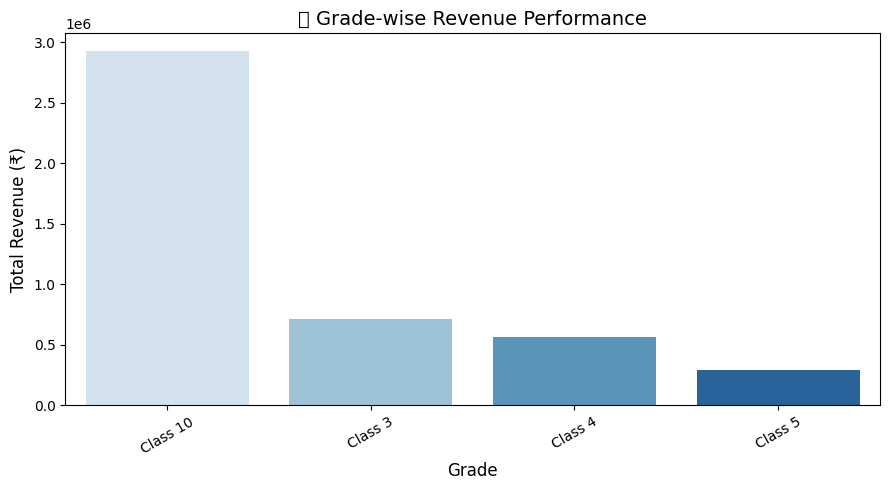

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the cleaned data is stored in 'grade_revenue' and 'state_revenue' DataFrames

# Set figure size
fig, ax = plt.subplots(figsize=(9, 5))

# Create bar plot for Grade-wise Revenue
sns.barplot(x="grade", y="Revenue", data=grade_revenue, palette="Blues", ax=ax)

# Title & Labels
plt.title("📊 Grade-wise Revenue Performance", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Total Revenue (₹)", fontsize=12)

# Show the plot
plt.xticks(rotation=30)  # Adjust labels to prevent overlap
plt.tight_layout()
plt.show()


<ipython-input-15-7c3864cf168c>:22: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


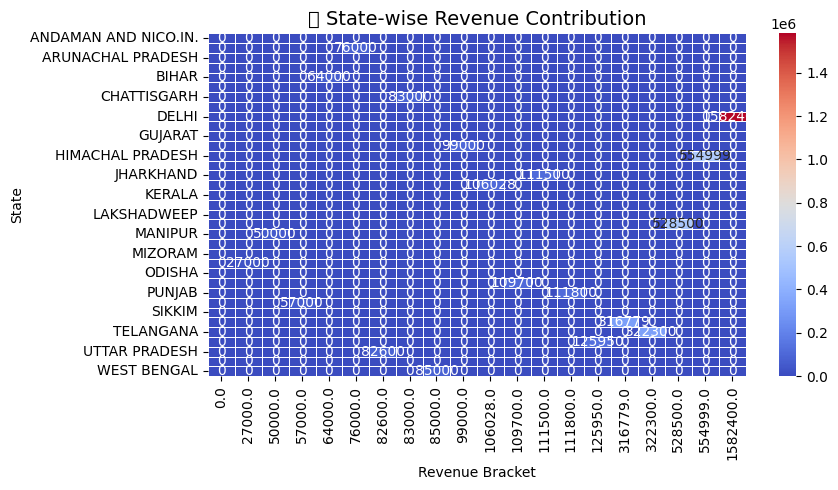

In [ ]:
# Ensure column names are correctly formatted
state_revenue.columns = ["State", "Revenue"]

# Pivot correctly to structure revenue data
state_pivot = state_revenue.pivot(index="State", columns="Revenue", values="Revenue")

# Handle potential empty values
state_pivot.fillna(0, inplace=True)

# Generate heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
sns.heatmap(state_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Add title & labels
plt.title("🌎 State-wise Revenue Contribution", fontsize=14)
plt.xlabel("Revenue Bracket")
plt.ylabel("State")

plt.tight_layout()
plt.show()


In [ ]:
# Aggregate revenue by Grade
grade_revenue = df.groupby("grade")["Revenue"].sum().reset_index()

# Aggregate revenue by State
state_revenue = df.groupby("state")["Revenue"].sum().reset_index()

# View extracted data
print(grade_revenue)
print(state_revenue)


      grade    Revenue
0  Class 10  2928876.0
1   Class 3   711580.0
2   Class 4   562500.0
3   Class 5   290600.0
                   state    Revenue
0   ANDAMAN AND NICO.IN.        0.0
1         ANDHRA PRADESH    76000.0
2      ARUNACHAL PRADESH        0.0
3                  ASSAM        0.0
4                  BIHAR    64000.0
5             CHANDIGARH        0.0
6            CHATTISGARH    83000.0
7   DADRA AND NAGAR HAV.        0.0
8                  DELHI  1582400.0
9                    GOA        0.0
10               GUJARAT        0.0
11               HARYANA    99000.0
12      HIMACHAL PRADESH   554999.0
13     JAMMU AND KASHMIR        0.0
14             JHARKHAND   111500.0
15             KARNATAKA   106028.0
16                KERALA        0.0
17                LADAKH        0.0
18           LAKSHADWEEP        0.0
19        MADHYA PRADESH   528500.0
20               MANIPUR    50000.0
21              MEGALAYA        0.0
22               MIZORAM        0.0
23              NAGAL

In [ ]:
# Calculate total revenue
total_revenue = df["Revenue"].sum()

# Add percentage columns
df["Revenue %"] = (df["Revenue"] / total_revenue) * 100

# Extract Grade-wise and State-wise revenue separately
grade_revenue = df[df["grade"].notnull()][["grade", "Revenue", "Revenue %"]].sort_values(by="Revenue", ascending=False)
state_revenue = df[df["state"].notnull()][["state", "Revenue", "Revenue %"]].sort_values(by="Revenue", ascending=False)

# View data
print(grade_revenue)
print(state_revenue)


          grade  Revenue  Revenue %
15492   Class 5  82600.0   1.838188
8165   Class 10  80000.0   1.780327
4655   Class 10  78028.0   1.736442
8689   Class 10  70000.0   1.557786
6029   Class 10  66000.0   1.468770
...         ...      ...        ...
5468   Class 10      0.0   0.000000
5469   Class 10      0.0   0.000000
5470   Class 10      0.0   0.000000
5471   Class 10      0.0   0.000000
16382   Class 5      0.0   0.000000

[16383 rows x 3 columns]
               state  Revenue  Revenue %
15492  UTTAR PRADESH  82600.0   1.838188
8165           DELHI  80000.0   1.780327
4655       KARNATAKA  78028.0   1.736442
8689      TAMIL NADU  70000.0   1.557786
6029           DELHI  66000.0   1.468770
...              ...      ...        ...
5468           DELHI      0.0   0.000000
5469      TAMIL NADU      0.0   0.000000
5470           DELHI      0.0   0.000000
5471      TAMIL NADU      0.0   0.000000
16382     TAMIL NADU      0.0   0.000000

[16383 rows x 3 columns]


<ipython-input-35-b8c2e3f2fdcd>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




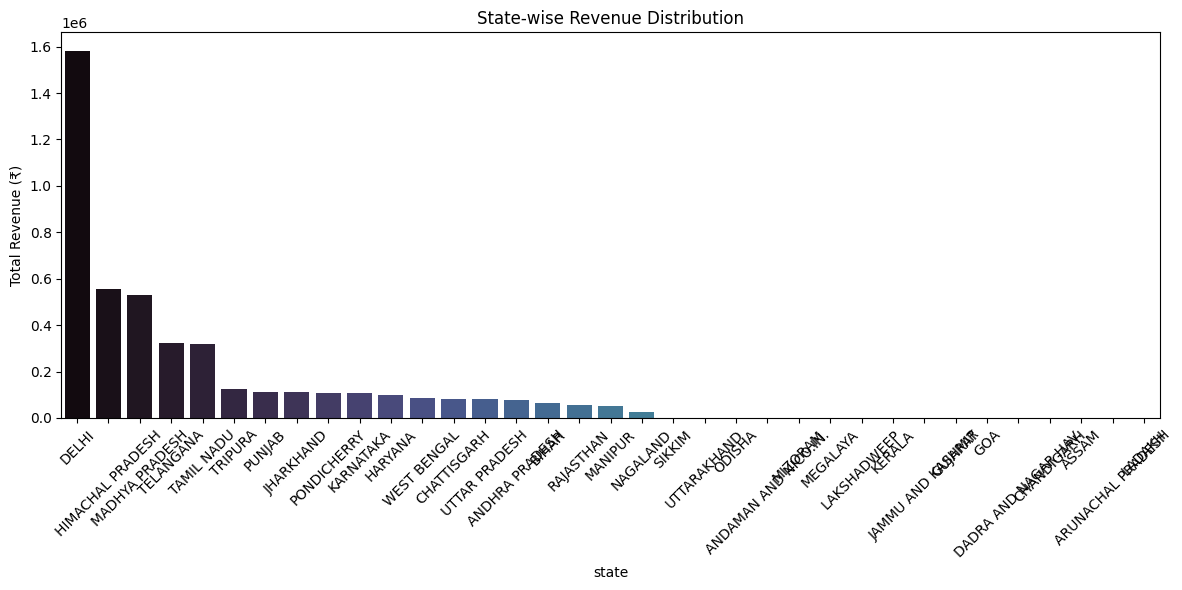

In [ ]:
# Group by 'State' and sum revenue
state_revenue = df.groupby('state')['Revenue'].sum().reset_index()

# Sort states by revenue descending
state_revenue = state_revenue.sort_values(by='Revenue', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=state_revenue, x='state', y='Revenue', palette='mako')

# Labels and title
plt.title('State-wise Revenue Distribution')
plt.xlabel('state')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-39-af884953a654>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




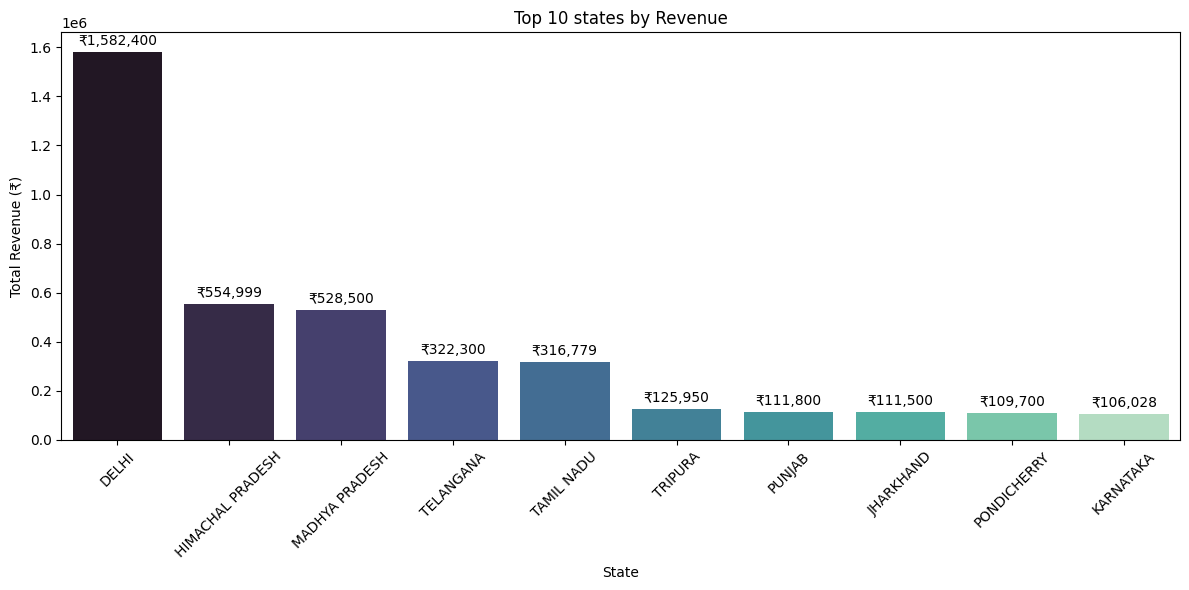

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'State' and sum revenue
state_revenue = df.groupby('state')['Revenue'].sum().reset_index()

# Sort states by revenue descending and take top 10
top_10_states = state_revenue.sort_values(by='Revenue', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_10_states, x='state', y='Revenue', palette='mako')

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + (max(top_10_states['Revenue']) * 0.01),  # slightly above bar
        f'₹{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Labels and title
plt.title('Top 10 states by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-42-a02461122f76>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-42-a02461122f76>:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




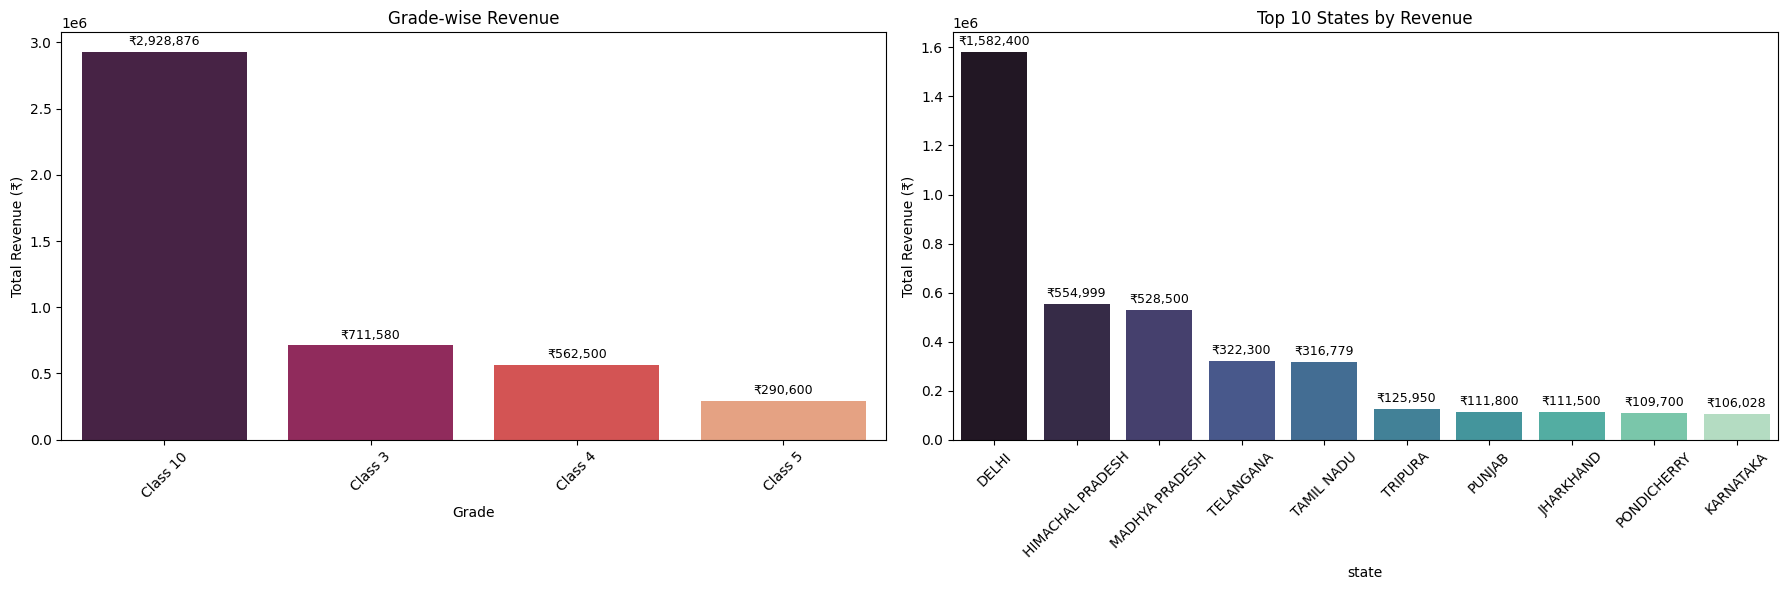

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and prepare grade-wise revenue
grade_revenue = df.groupby('grade')['Revenue'].sum().reset_index()
grade_revenue = grade_revenue.sort_values(by='Revenue', ascending=False)

# Group and prepare state-wise revenue (top 10)
state_revenue = df.groupby('state')['Revenue'].sum().reset_index()
top_10_states = state_revenue.sort_values(by='Revenue', ascending=False).head(10)

# Create figure and two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Grade-wise revenue bar chart
sns.barplot(data=grade_revenue, x='grade', y='Revenue', palette='rocket', ax=axes[0])
axes[0].set_title('Grade-wise Revenue')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Total Revenue (₹)')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels on bars for grade-wise
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(
        p.get_x() + p.get_width() / 2.,
        height + max(grade_revenue['Revenue']) * 0.01,
        f'₹{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# State-wise revenue bar chart (top 10)
sns.barplot(data=top_10_states, x='state', y='Revenue', palette='mako', ax=axes[1])
axes[1].set_title('Top 10 States by Revenue')
axes[1].set_xlabel('state')
axes[1].set_ylabel('Total Revenue (₹)')
axes[1].tick_params(axis='x', rotation=45)

# Add value labels on bars for state-wise
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(
        p.get_x() + p.get_width() / 2.,
        height + max(top_10_states['Revenue']) * 0.01,
        f'₹{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()


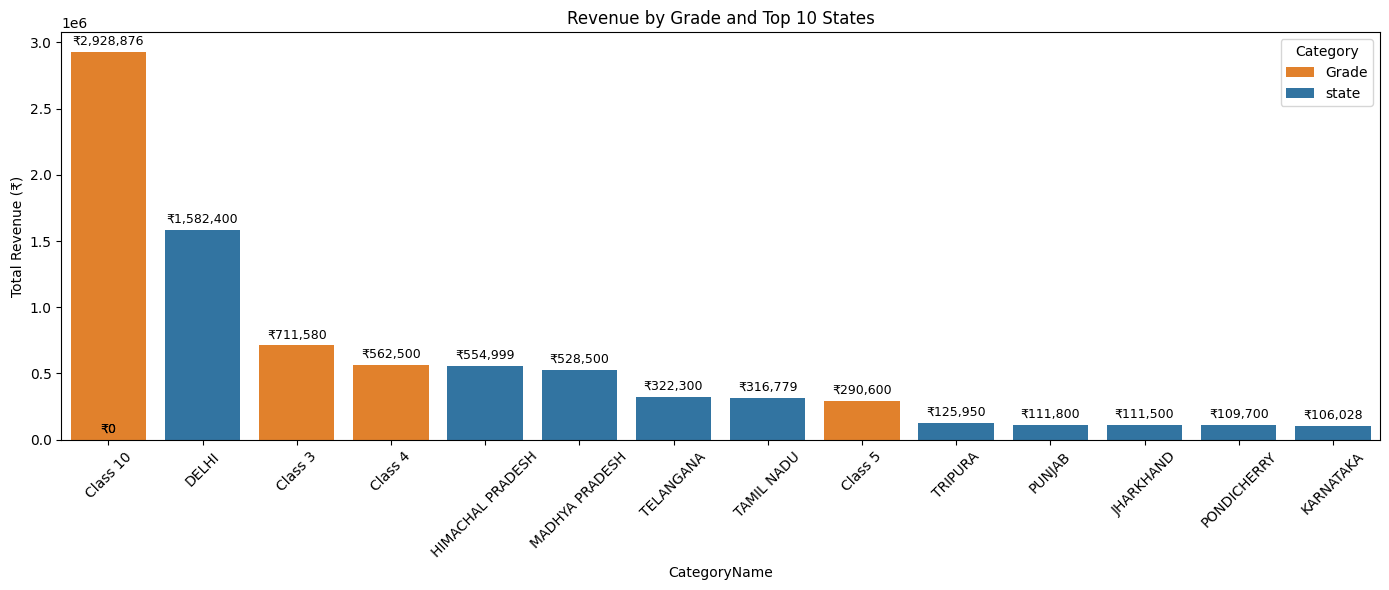

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data
grade_revenue = df.groupby('grade')['Revenue'].sum().reset_index()
grade_revenue['Category'] = 'Grade'

state_revenue = df.groupby('state')['Revenue'].sum().reset_index()
top_10_states = state_revenue.sort_values(by='Revenue', ascending=False).head(10)
top_10_states['Category'] = 'state'

# Combine
combined = pd.concat([
    grade_revenue.rename(columns={'grade':'CategoryName'}),
    top_10_states.rename(columns={'state':'CategoryName'})
])

# Add order so grades first, states after
combined['Order'] = combined.apply(lambda row: 0 if row['Category'] == 'grade' else 1, axis=1)

# Sort combined by Order and Revenue descending within each group
combined = combined.sort_values(['Order', 'Revenue'], ascending=[True, False])

plt.figure(figsize=(14,6))

# Plot bars with different colors for Grade and State
palette = {'Grade':'#ff7f0e', 'state':'#1f77b4'}  # Orange and blue business colors
sns.barplot(data=combined, x='CategoryName', y='Revenue', hue='Category', palette=palette)

plt.xticks(rotation=45)
plt.ylabel('Total Revenue (₹)')
plt.title('Revenue by Grade and Top 10 States')

# Annotate bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + max(combined['Revenue']) * 0.01,
        f'₹{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.legend(title='Category')
plt.tight_layout()
plt.show()


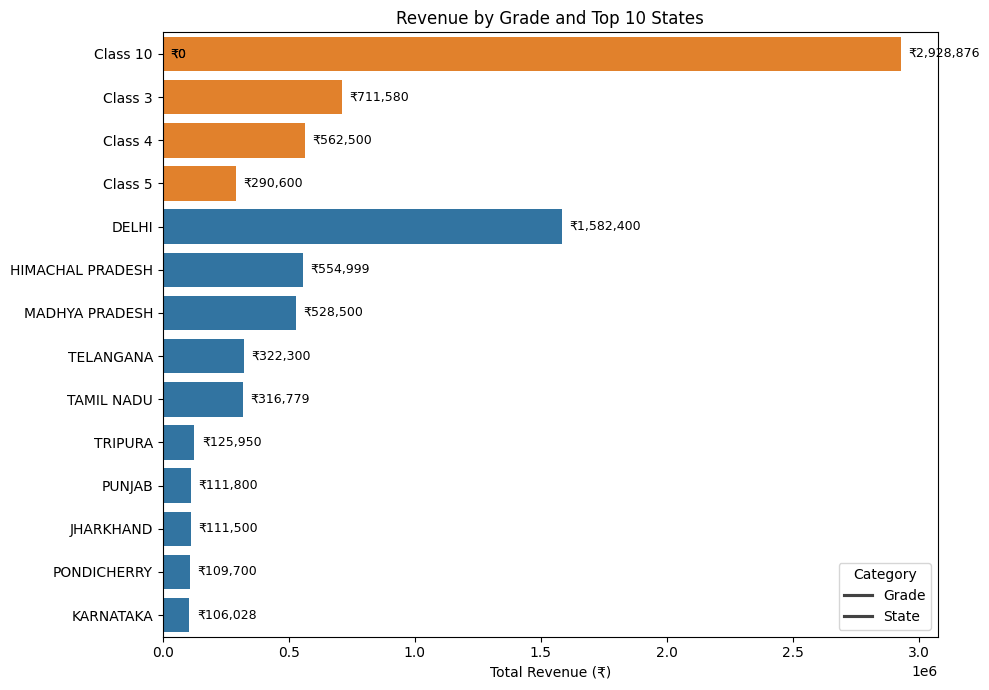

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data
grade_revenue = df.groupby('grade')['Revenue'].sum().reset_index()
grade_revenue['Category'] = 'grade'

state_revenue = df.groupby('state')['Revenue'].sum().reset_index()
top_10_states = state_revenue.sort_values(by='Revenue', ascending=False).head(10)
top_10_states['Category'] = 'state'

# Combine data
combined = pd.concat([
    grade_revenue.rename(columns={'grade': 'CategoryName'}),
    top_10_states.rename(columns={'state': 'CategoryName'})
])

# Add order to keep grades first
combined['Order'] = combined['Category'].apply(lambda x: 0 if x == 'grade' else 1)
combined = combined.sort_values(['Order', 'Revenue'], ascending=[True, False])

plt.figure(figsize=(10, 7))

palette = {'grade': '#ff7f0e', 'state': '#1f77b4'}  # Orange & Blue

# Plot horizontal grouped bar chart
sns.barplot(data=combined, y='CategoryName', x='Revenue', hue='Category', palette=palette)

plt.xlabel('Total Revenue (₹)')
plt.ylabel('')
plt.title('Revenue by Grade and Top 10 States')
plt.legend(title='Category', labels=['Grade', 'State'])

# Annotate bars with revenue values
ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    ax.text(width + max(combined['Revenue']) * 0.01, p.get_y() + p.get_height() / 2,
            f'₹{width:,.0f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()
